In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import Unet
from tool.evaluate import *

In [2]:
model = Unet().to('cuda')
inputs = torch.Tensor(np.load('inputs_test.npy')).to('cuda')
labels = np.load('outputs_test.npy')

In [3]:
checkpoint = torch.load('model_pi/model_10000.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

Unet(
  (maxpool): MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(32, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder3): Sequential(
    (0): Conv3d(128, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder4): Sequential(
    (0): Conv3d(256, 256, kernel_size=(2, 2, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), p

In [4]:
idx = 0

In [5]:
inputs[idx, ...].shape

torch.Size([3, 513, 257, 1])

In [6]:
b_norm = 2500

In [7]:
b = model(torch.permute(inputs[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b = b.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B = labels[idx, ...]*b_norm
B = B.transpose(1, 2, 3, 0)

In [8]:
b.shape

(513, 257, 50, 3)

In [9]:
B.shape

(513, 257, 50, 3)

In [10]:
metric(b, B)

{'c_vec': 0.92592686,
 'c_cs': 0.2210935141572045,
 "E_n'": 0.4023894667625427,
 "E_m'": -0.06691416175544784,
 'eps': 0.9383098}

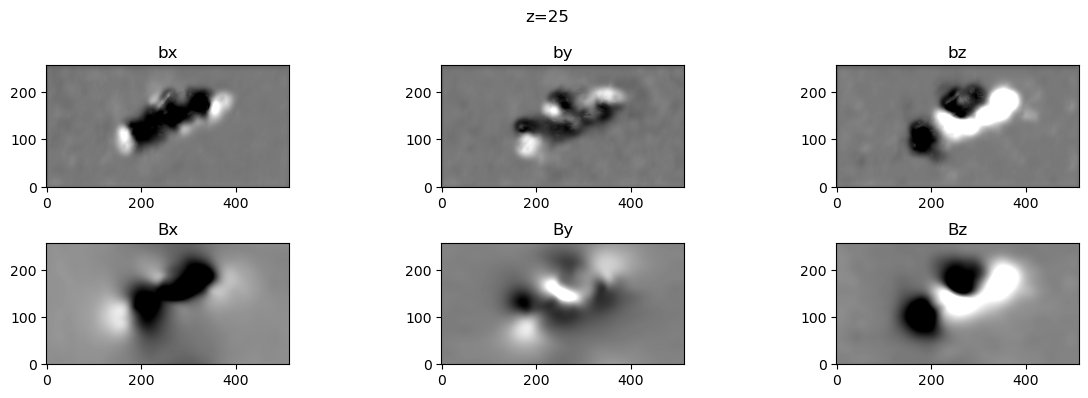

In [11]:
plot_overview(b, B, z=25, b_norm=100)

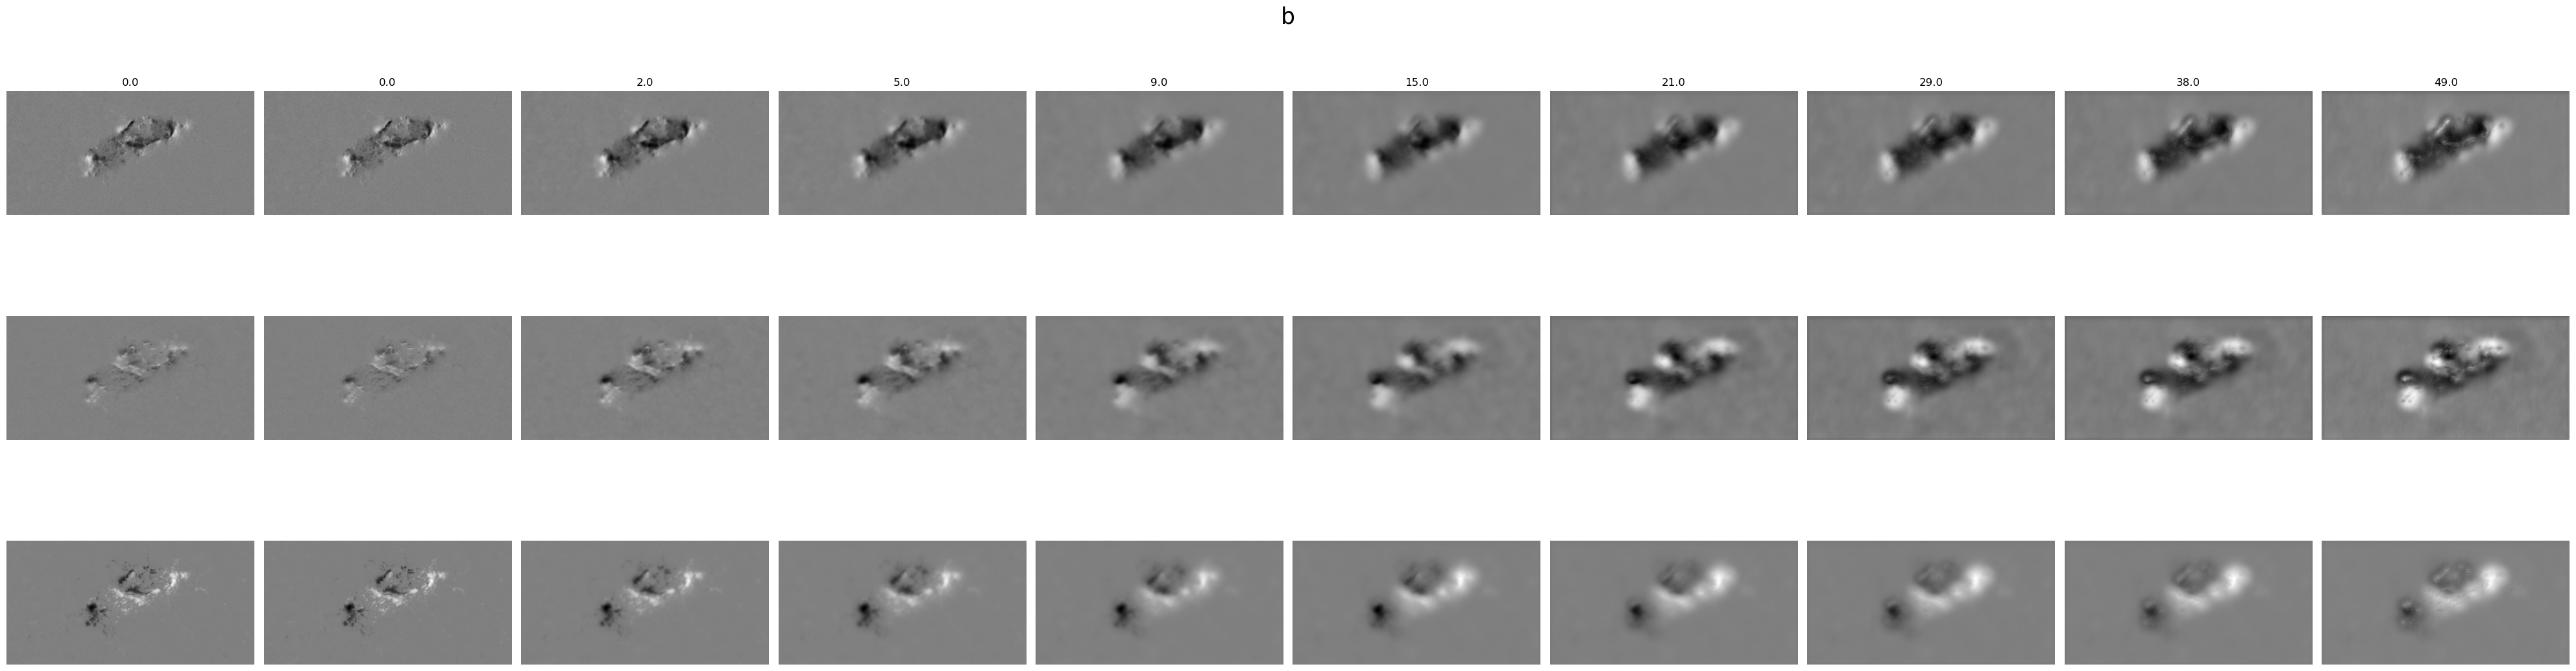

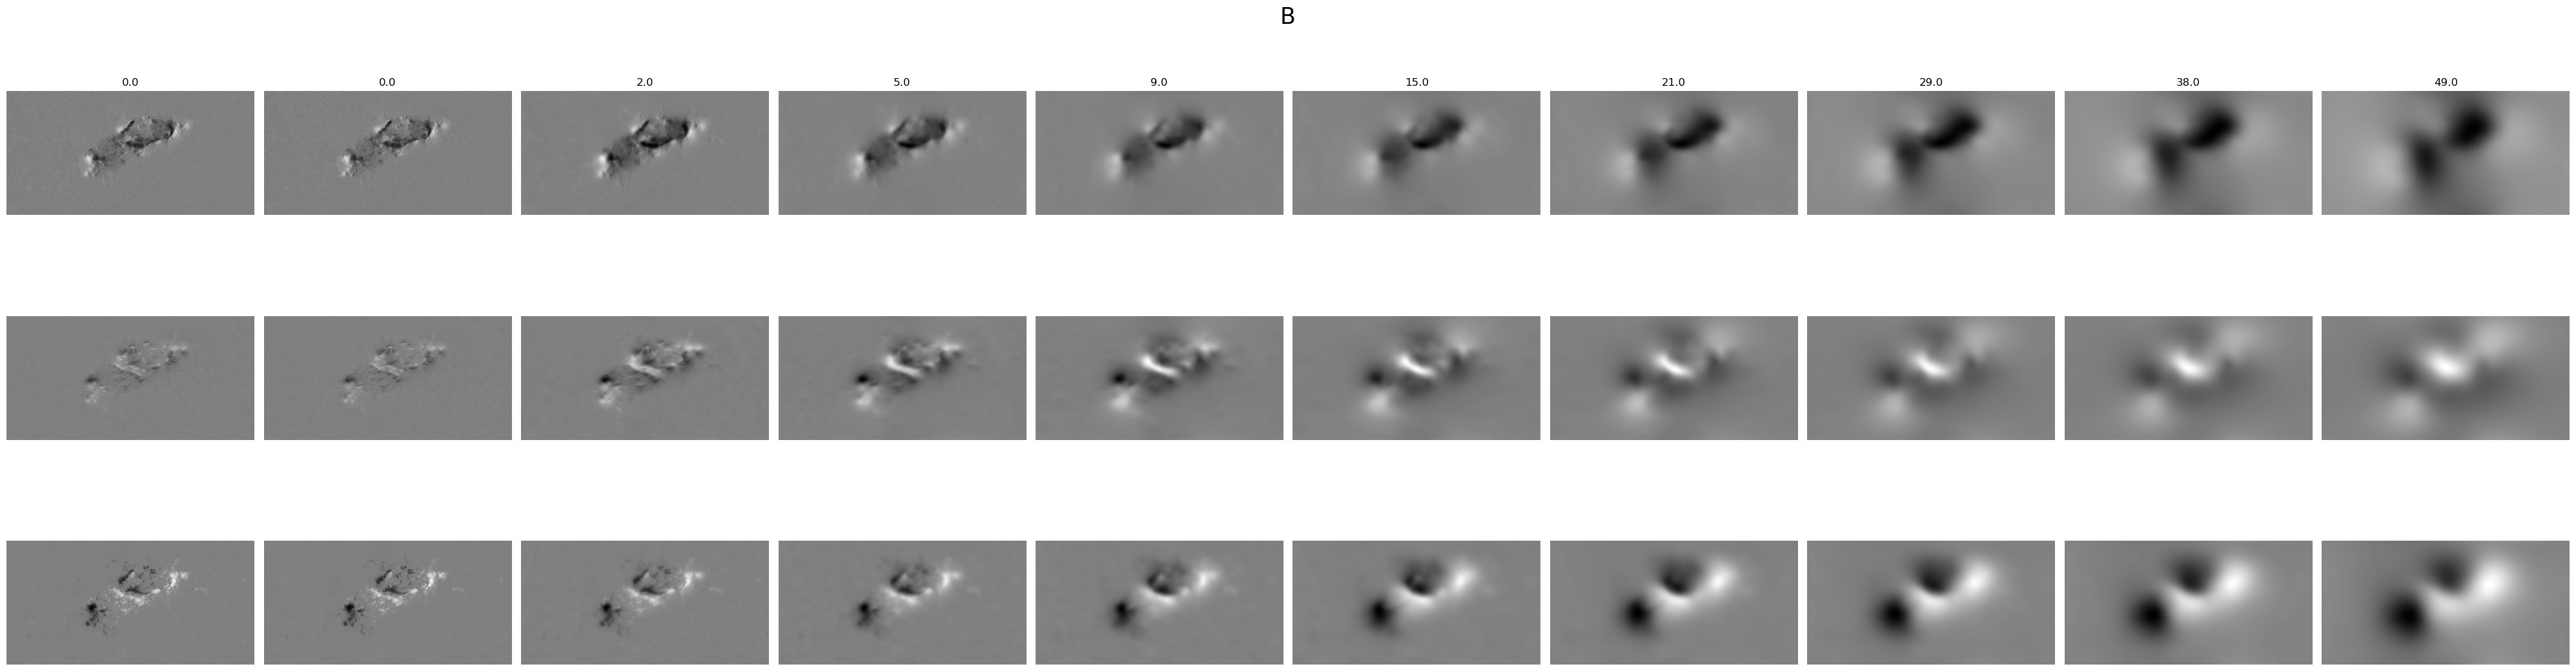

In [12]:
plot_sample(b, B)